In [364]:
%matplotlib inline
import json
import pylab
import numpy as np
from lxml import etree
import matplotlib.colors
from pysurvey.plot import setup, icolorbar, text, box

In [567]:

print cdict
# for i, rgb in enumerate(rgbs):
#     print '{:.2f}'.format(i*1.0/(len(rgbs)-1)), map(lambda x: '{:.2f}'.format(x/256.0), rgb)

{'blue': [(0.0, 0.63671875, 0.63671875), (0.25, 0.71875, 0.71875), (0.5, 0.2890625, 0.2890625), (0.75, 0.109375, 0.109375), (1.0, 0.0, 0.0)], 'green': [(0.0, 0.3046875, 0.3046875), (0.25, 0.4921875, 0.4921875), (0.5, 0.68359375, 0.68359375), (0.75, 0.1015625, 0.1015625), (1.0, 0.49609375, 0.49609375)], 'red': [(0.0, 0.59375, 0.59375), (0.25, 0.21484375, 0.21484375), (0.5, 0.30078125, 0.30078125), (0.75, 0.890625, 0.890625), (1.0, 0.99609375, 0.99609375)]}


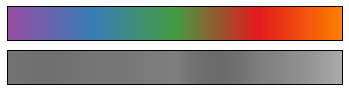

In [576]:
def make_cmap():
#     cdict = dict(
#         red = (
#             (0.00, 0.89, 0.89),
#             (0.25, 0.21, 0.21),
#             (0.50, 0.30, 0.30),
#             (0.75, 0.59, 0.59),
#             (1.00, 1.00, 1.00),
#         ),
#         green = (
#             (0.00, 0.10, 0.10),
#             (0.25, 0.49, 0.49),
#             (0.50, 0.68, 0.68),
#             (0.75, 0.30, 0.30),
#             (1.00, 0.50, 0.50),
#         ),
#         blue = (
#             (0.00, 0.11, 0.11),
#             (0.25, 0.72, 0.72),
#             (0.50, 0.29, 0.29),
#             (0.75, 0.64, 0.64),
#             (1.00, 0.00, 0.00),
#         ),
#     )
    rgbs = (
        (152,78,163),
        (55,126,184),
        #(77,175,74),
        (69, 157, 66),
        (228,26,28),
        (255,127,0),
    )
    cdict = {}
    colors = ['red', 'green', 'blue']
    for i,rgb in enumerate(rgbs):
        for color,value in zip(colors, rgb):
            c = cdict.get(color, [])
            c.append((i*1.0/(len(rgbs)-1.0), value/256.0, value/256.0))
            cdict[color] = c

#     cdict = {'red':((0.00, 0, 0), 
#                     (0.35, 0, 0), 
# #                     (0.66, 0.8, 0.8), 
#                     (0.89, 0.8, 0.8),
#                     (1.00, 0.4, 0.4)),
#              'green': ((0.000, 0, 0),
#                        (0.125, 0, 0),
#                        (0.375, 0.8, 0.8),
# #                        (0.640, 0.8, 0.8),
#                        (0.910, 0,0), 
#                        (1.000, 0, 0)),
#                'blue':  ((0.00, 0.4, 0.4),
#                          (0.11, 0.8, 0.8),
# #                          (0.34, 0.8, 0.8),
#                          (0.65, 0, 0),
#                          (1.00, 0, 0))}
#     def c(name):
#         return lambda x: np.clip(pylab.cm.datad['rainbow'][name](x),0,0.8)
    
#     cdict = dict(
#         red = c('red'),
#         green = c('green'),
#         blue = c('blue'),
        
#     )
    cmap = matplotlib.colors.LinearSegmentedColormap('my_colormap',cdict,512)
    return cmap

def grayify_cmap(cmap):
    colors = cmap(np.arange(cmap.N))
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    return cmap.from_list(cmap.name + "_grayscale", colors, cmap.N)

def show_colormap(cmap):
    im = np.outer(np.ones(10), np.arange(100))
    fig, ax = pylab.subplots(2, figsize=(6, 1.5), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.1)
    ax[0].imshow(im, cmap=cmap)
    ax[1].imshow(im, cmap=grayify_cmap(cmap))
    
show_colormap(make_cmap())


In [124]:
with open('/Users/ajmendez/data/reddit/subreddit_ages.json', 'r') as f:
    subreddit_map = json.load(f)

In [119]:
tree = etree.parse("/Users/ajmendez/Desktop/subreddits.gexf", base_url='http://www.gexf.net/1.2draft')

In [120]:
ns = {'graph': '{http://www.gexf.net/1.2draft}graph'}
graph = tree.getroot().find(ns['graph'])

In [121]:
for item in graph.findall('.*//*[@id="1"]'):
    etree.dump(item)
    break


<node xmlns="http://www.gexf.net/1.2draft" xmlns:viz="http://www.gexf.net/1.2draft/viz" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" id="1" label="2012Elections">
        <attvalues>
          <attvalue for="indegree" value="0"/>
          <attvalue for="outdegree" value="0"/>
          <attvalue for="degree" value="0"/>
        </attvalues>
        <viz:size value="4.499178"/>
        <viz:position x="120.128914" y="306.1989" z="0.0"/>
        <viz:color r="56" g="130" b="182"/>
      </node>
      


In [247]:
len([k for k,v in subreddit_map.iteritems() if v[-1] > 400])

53

In [180]:
ages = [v[0] for k,v in subreddit_map.iteritems()]
np.min(ages), np.max(ages)

(14.0, 40.0)

In [618]:
city_subreddits = ('orlando Quebec Colorado Calgary paris bayarea wisconsin france ottawa houston vancouver '
                   'newzealand Iowa sanantonio montreal ontario Miami mexico Atlanta Seattle sanfrancisco '
                   'toronto nothernireland boston canada LosAngeles philadelphia raleigh chicago sandiego '
                   'japan ireland nyc melbourne tampaDenver Taxans Dallas China sydney Denmark brisbane pakistan').split()

agenorm = matplotlib.colors.Normalize(16, 30, clip=True)
dtype = [
    ('id', np.int),
    ('subreddit', '|S64'),
    ('nunique', np.int),
    ('iscity', np.int),
    ('x', np.float),
    ('y', np.float),
    ('size', np.float),
    ('age', np.float),
    ('rgba', np.float, 4),
]
data = np.zeros(len(subreddit_map), dtype=dtype)
for i, (subreddit, value) in enumerate(subreddit_map.iteritems()):
    try:
        tag = graph.findall('.*//*[@label="{}"]'.format(subreddit))[0]
    except Exception as e:
#         print '!',
#         print subreddit, e
        continue
    s = tag[1].attrib
    p = tag[2].attrib
    age = value[0]
    nunique = value[-1]
    data[i] = (int(tag.attrib['id']),
               subreddit,
               nunique,
               (subreddit in city_subreddits),
               float(p['x']), 
               float(p['y']),
               float(s['value']),
               age,
               pylab.cm.Spectral(agenorm(age)),
              )
#     print i, subreddit, age
#     etree.dump(tag)
#     if i > 10:
#         break

# Make cluster plot

<matplotlib.colorbar.Colorbar instance at 0x11f851cb0>

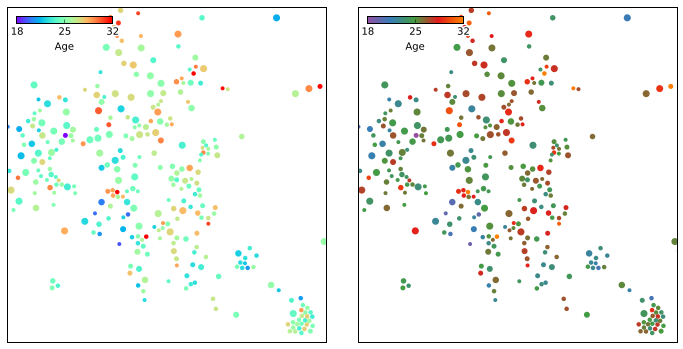

In [577]:
sub_width = 400
sub_xoffset = 70

setup_clusters(sub_width, sub_xoffset, figsize=(12,6), subplt=(1,2,1))
sca = plot_cluster(data, cmap=pylab.cm.rainbow, vmin=18, vmax=32)
icolorbar(sca, loc=2, borderpad=0.75, tickfmt='{:.0f}')

setup_clusters(sub_width, sub_xoffset, subplt=(1,2,2))
sca = plot_cluster(data, cmap=make_cmap(), vmin=18, vmax=32)
icolorbar(sca, loc=2, borderpad=0.75, tickfmt='{:.0f}')


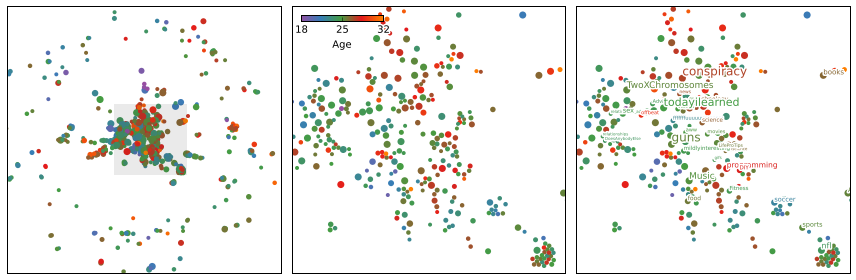

In [634]:
def setup_clusters(width=1500, xoffset=0, yoffset=0, **params):
    kwargs = dict(xticks=False, yticks=False, grid=False, tickmarks=False)
    kwargs.update(params)
    ax = setup(xr=[-width+xoffset,width+xoffset], yr=[-width+yoffset,width+yoffset], **kwargs)
    return ax
    
    
def plot_cluster(data, isgood=None, vmin=18, vmax=32, cmap=None, maxsize=50, sizescale=1.0, **kwargs):
    if isgood is None: isgood = (np.ones(data.shape) == 1)
    if cmap is None: cmap=make_cmap()
    agenorm = matplotlib.colors.Normalize(vmin, vmax, clip=True)
    index = np.where(isgood & (data['x'] != 0) & (data['y'] != 0))[0]
    sca = pylab.scatter(data['x'][index], data['y'][index], label='Age',
                        s=np.clip(data['size'][index]**2, 4, maxsize)*sizescale, 
                        c=data['age'][index], vmin=vmin, vmax=vmax, cmap=cmap, lw=0, **kwargs)
    return sca

def label_clusters(data, isgood=None, vmin=18, vmax=32, cmap=None, ax=None, sizescale=1.0):
    if isgood is None: isgood = (np.ones(data.shape) == 1)
    if cmap is None: cmap=make_cmap()
    if ax is None: ax = pylab.gca()
    
    agenorm = matplotlib.colors.Normalize(vmin, vmax, clip=True)
    xr,yr = pylab.xlim(), pylab.ylim()
    index = np.where(isgood & 
                     (data['x'] > xr[0]) & (data['x'] < xr[1]) & 
                     (data['y'] > yr[0]) & (data['y'] < yr[1]) & 
                     
                     (data['x'] != 0) & (data['y'] != 0))[0]
    for x,y,label,age,s in data[index][['x','y','subreddit', 'age', 'size']]:
        if len(label) == 0: continue
        color=cmap(agenorm(age))
        s = np.clip(s, 4,12)*sizescale
        tmp = text(x,y,label, color=color,
                   ha='left', va='bottom', fontsize=s,
                   clip_on=True, clip_path=ax.patch, outline=True)

        tmp.set_clip_path(ax.patch)
    
main_width = 1500
sub_width = 400
sub_xoffset = 70

setup_clusters(main_width, figsize=(12,4), subplt=(1,3,1))
box([-sub_width+sub_xoffset,sub_width+sub_xoffset], [-sub_width,sub_width], lw=0, alpha=0.1)
plot_cluster(data)

setup_clusters(sub_width, sub_xoffset, subplt=(1,3,2))
sca = plot_cluster(data)
icolorbar(sca, loc=2, borderpad=0.75, tickfmt='{:.0f}')


setup_clusters(sub_width, sub_xoffset, subplt=(1,3,3))
plot_cluster(data)
label_clusters(data, (data['nunique'] > 400))

    
pylab.tight_layout()
# pylab.savefig('/Users/ajmendez/Desktop/subreddits.png', dpi=200)

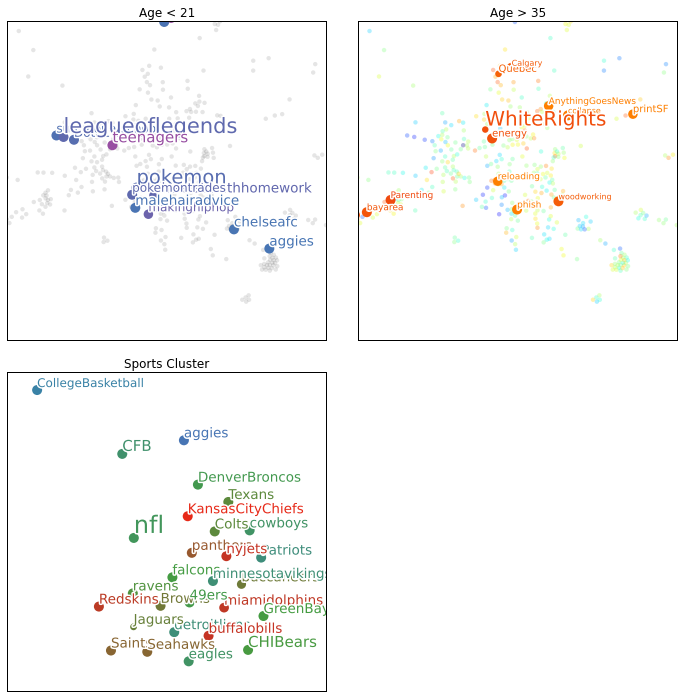

In [625]:
sub_width = 600
sub_xoffset = 20
sub_yoffset = -40
setup_clusters(sub_width, sub_xoffset, sub_yoffset, figsize=(12,12), subplt=(2,2,1), title='Age < 21')
plot_cluster(data, vmin=0, vmax=1, cmap=pylab.cm.Greys, alpha=0.1, maxsize=20)
isage = (data['age'] < 21) & (data['nunique'] > 4)
sca = plot_cluster(data, isage, sizescale=2.0)
label_clusters(data, isage, sizescale=3.0)

setup_clusters(sub_width, sub_xoffset, sub_yoffset, subplt=(2,2,2), title='Age > 35')
plot_cluster(data, cmap=pylab.cm.jet, alpha=0.3, maxsize=20)
isage = (data['age'] > 30) & (data['nunique'] > 4)
sca = plot_cluster(data, isage, sizescale=2.0)
label_clusters(data, isage, sizescale=2.0)

sub_width = 60
sub_xoffset = 400
sub_yoffset = -330
setup_clusters(sub_width, sub_xoffset, sub_yoffset, subplt=(2,2,3), title='Sports Cluster')
plot_cluster(data, vmin=0, vmax=1, cmap=pylab.cm.Greys, alpha=0.1, maxsize=20)
isage = (data['size'] > 3)
sca = plot_cluster(data, isage, sizescale=2.0)
label_clusters(data, isage, sizescale=3.0)


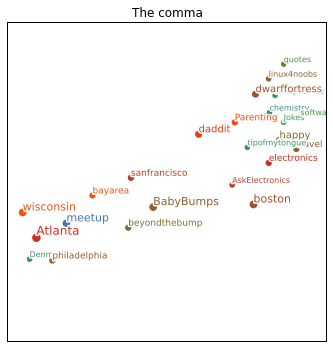

In [600]:
sub_width = 100
sub_xoffset = -500
sub_yoffset = -150
setup_clusters(sub_width, sub_xoffset, sub_yoffset, figsize=(12,12), subplt=(2,2,1), title='The comma')
plot_cluster(data, vmin=0, vmax=1, cmap=pylab.cm.Greys, alpha=0.1, maxsize=20)
isage = (data['size'] > 3) & (data['age'] > 0)
sca = plot_cluster(data, isage, sizescale=2.0)
label_clusters(data, isage, sizescale=2.0)

<matplotlib.colorbar.Colorbar instance at 0x128b826c8>

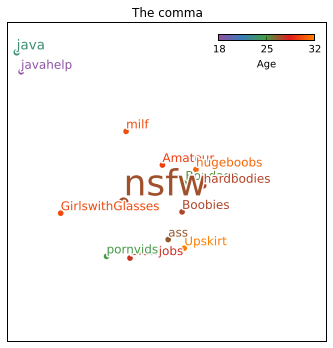

In [615]:
sub_width = 100
sub_xoffset = 1000
sub_yoffset = 150
setup_clusters(sub_width, sub_xoffset, sub_yoffset, figsize=(12,12), subplt=(2,2,1), title='The comma')
plot_cluster(data, vmin=0, vmax=1, cmap=pylab.cm.Greys, alpha=0.1, maxsize=20)
isage = (data['size'] > 3) & (data['age'] > 0)
sca = plot_cluster(data, isage, sizescale=2.0)
label_clusters(data, isage, sizescale=3.0)
icolorbar(sca, loc=1)

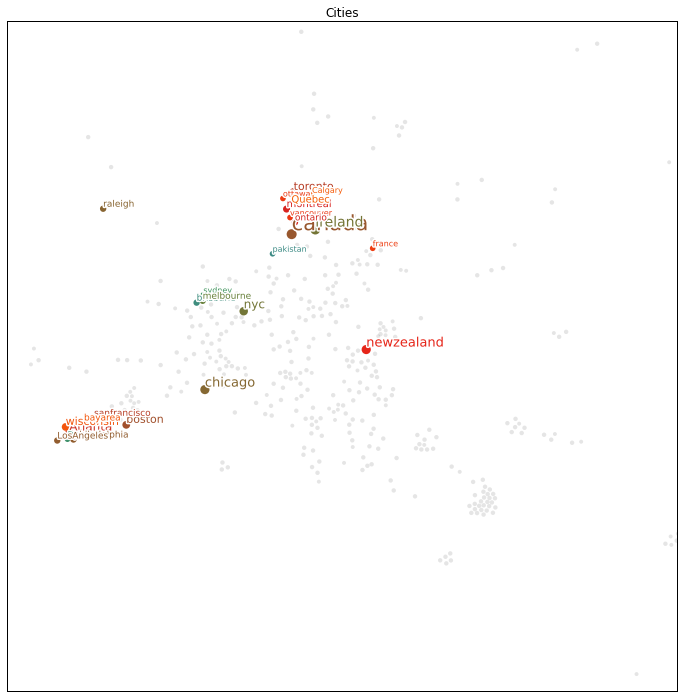

In [619]:
sub_width = 800
sub_xoffset = 70
sub_yoffset = 0
setup_clusters(sub_width, sub_xoffset, sub_yoffset, figsize=(12,12),  title='Cities')
plot_cluster(data, vmin=0, vmax=1, cmap=pylab.cm.Greys, alpha=0.1, maxsize=20)
isage = (data['size'] > 3) & (data['age'] > 0) & (data['iscity'] ==1)
sca = plot_cluster(data, isage, sizescale=2.0)
label_clusters(data, isage, sizescale=2.0)

<Container object of 14 artists>

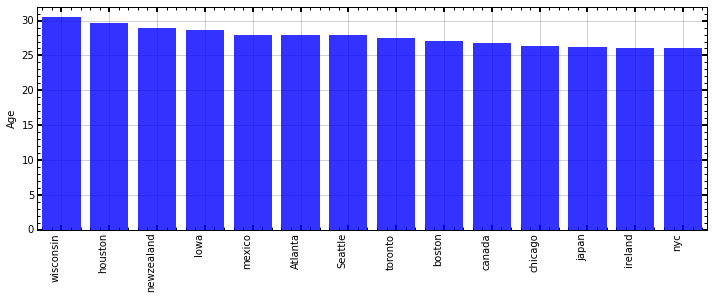

In [516]:
tmp = data[np.argsort(-data['age'])]
iscity = (tmp['size'] > 5) & (tmp['age'] > 10) & (tmp['iscity'] > 0)
ncity = len(np.where(iscity)[0])
setup(figsize=(12,4), ylabel='Age', yr=[0, 32],
      xr=[0, ncity], xtickv=np.arange(ncity)+0.5,
      xticknames=tmp['subreddit'][iscity], xtickrotate=90)
pylab.bar(left=np.arange(ncity)+0.1,
          width=0.8,
          height=tmp['age'][iscity], lw=0, alpha=0.8)


In [500]:
tmp = data[np.argsort(-data['age'])]
isage = (tmp['size'] > 3) & (tmp['age'] > 10) & (tmp['subreddit'] != '')
for age, subreddit in tmp[['age', 'subreddit']][isage]:
#     print '{:0.1f} {}'.format(age, subreddit)
    pass

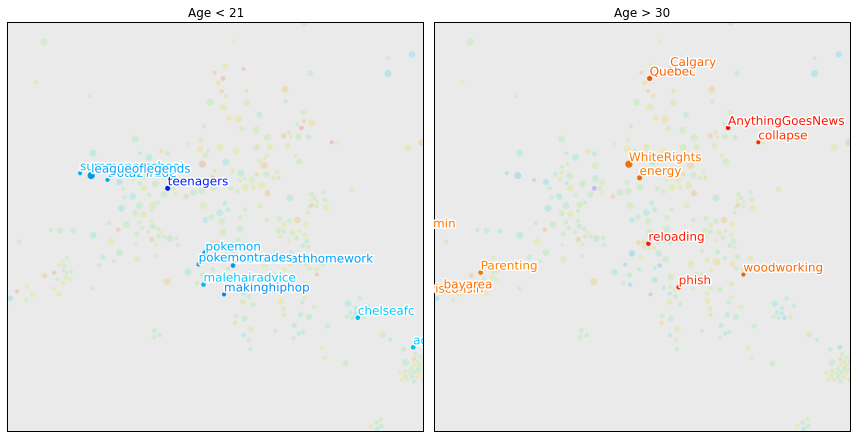

In [366]:
def plot_

# cmap = pylab.cm.gist_heat_r
cmap = pylab.cm.jet
vmin=14
vmax=35
agenorm = matplotlib.colors.Normalize(vmin, vmax, clip=True)

kwargs = dict(xticks=False, yticks=False, grid=False, tickmarks=False)

big=1500
nm = 500
xo = -70
ax = setup(figsize=(12,12), subplt=(2,2,2), 
           title='Age > 30',
           xr=[-nm+xo,nm+xo], yr=[-nm,nm], **kwargs)
box([-nm+xo,nm+xo], [-nm,nm], lw=0, alpha=0.1)

ii = np.where((data['x'] != 0) & (data['y'] != 0))[0]
sca = pylab.scatter(data['x'][ii], data['y'][ii], label='Age',
              s=np.clip(data['size'][ii]**2, 4, 50),  alpha=0.2, 
              c=data['age'][ii], vmin=vmin, vmax=vmax, cmap=cmap, lw=0)


ii = np.where((data['x'] != 0) & (data['y'] != 0) & 
              (data['nunique'] > 10) & (data['age'] > 30))[0]
sca = pylab.scatter(data['x'][ii], data['y'][ii], label='Age',
              s=np.clip(data['size'][ii]**2, 4, 50), 
              c=data['age'][ii], vmin=vmin, vmax=vmax, cmap=cmap, lw=0)
for x,y,label,age,s in data[ii][['x','y','subreddit', 'age', 'size']]:
    if len(label) == 0: continue
    color = cmap(agenorm(age))
    tmp = text(x,y,label, color=color,
                     ha='left', va='bottom', fontsize=12,
                    clip_on=True, clip_path=ax.patch, outline=True)
    
    tmp.set_clip_path(ax.patch)

    
    
ax = setup(subplt=(2,2,1), 
           title='Age < 21',
           xr=[-nm+xo,nm+xo], yr=[-nm,nm], **kwargs)
box([-nm+xo,nm+xo], [-nm,nm], lw=0, alpha=0.1)

ii = np.where((data['x'] != 0) & (data['y'] != 0))[0]
sca = pylab.scatter(data['x'][ii], data['y'][ii], label='Age',
              s=np.clip(data['size'][ii]**2, 4, 50),  alpha=0.2, 
              c=data['age'][ii], vmin=vmin, vmax=vmax, cmap=cmap, lw=0)


ii = np.where((data['x'] != 0) & (data['y'] != 0) & 
              (data['nunique'] > 10) & (data['age'] < 21))[0]
sca = pylab.scatter(data['x'][ii], data['y'][ii], label='Age',
              s=np.clip(data['size'][ii]**2, 4, 50), 
              c=data['age'][ii], vmin=vmin, vmax=vmax, cmap=cmap, lw=0)
for x,y,label,age,s in data[ii][['x','y','subreddit', 'age', 'size']]:
    if len(label) == 0: continue
    color = cmap(agenorm(age))
    tmp = text(x,y,label, color=color,
                     ha='left', va='bottom', fontsize=12,
                    clip_on=True, clip_path=ax.patch, outline=True)
    
    tmp.set_clip_path(ax.patch)
    
    
pylab.tight_layout()
# pylab.savefig('/Users/ajmendez/Desktop/subreddits.png', dpi=200)

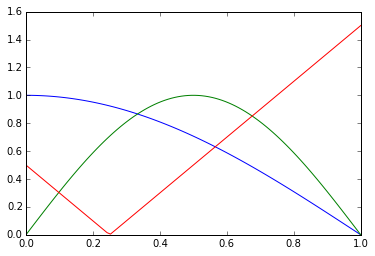

In [550]:
x = np.linspace(0,1,100)
pylab.plot(x, pylab.cm.datad['rainbow']['blue'](x))
pylab.plot(x, pylab.cm.datad['rainbow']['green'](x))
pylab.plot(x, pylab.cm.datad['rainbow']['red'](x))